# False Bay ADCP Study Stie Mapping 
## Ethan Smith 14/07/2025 - SMTETH005

### Bathymetry Map

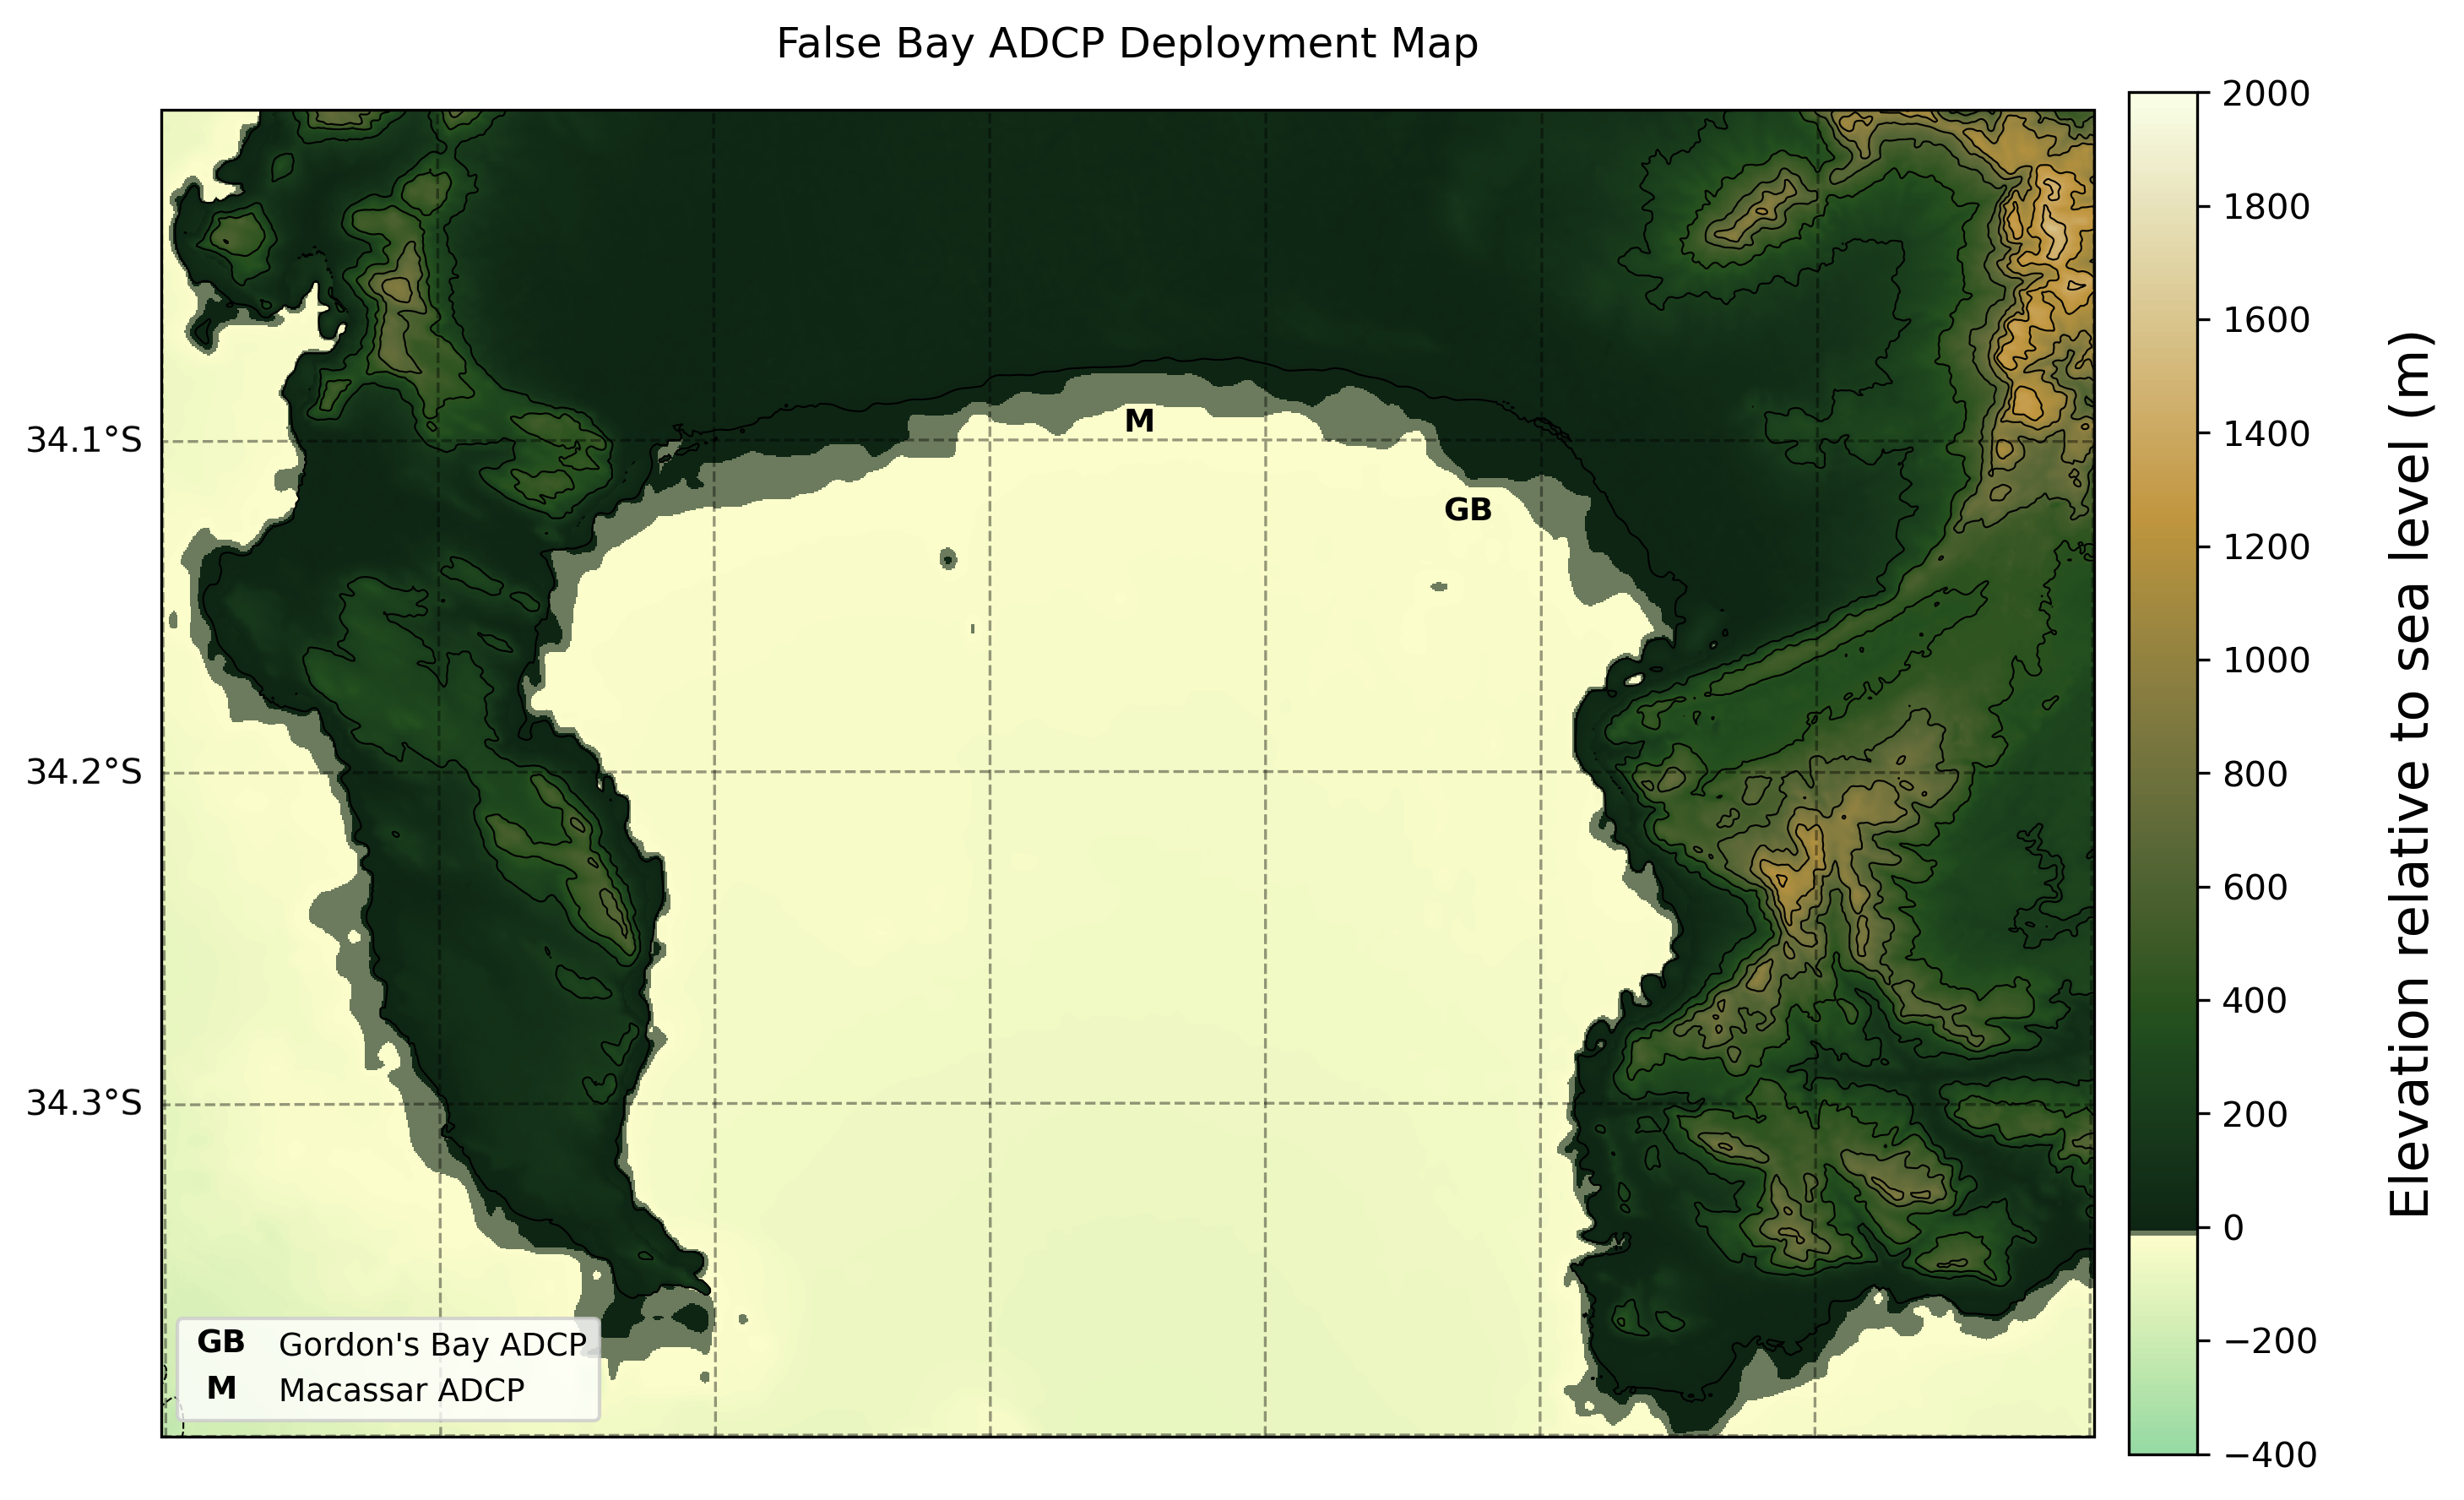

In [35]:
# Import necessary packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean
import xarray as xr
import cartopy.feature as cfeature
import matplotlib.patches as mpatches
import numpy as np  # Added import for numpy

# Load the GMRT .grd file
ds = xr.open_dataset(r"C:\Users\ethan\OneDrive\UCT\Honours 2025\Honours Project\Map\bathymetry data files\GMRT\GMRTv4_3_1_20250714topo.grd")

# Extract dimensions and coordinate ranges
nx, ny = ds['dimension'].values # number of grid points in x (lon) and y (lat)          
x_min, x_max = ds['x_range'].values 
y_min, y_max = ds['y_range'].values

# Build longitude and latitude arrays
lon = np.linspace(x_min, x_max, nx) 
lat = np.linspace(y_min, y_max, ny)

# Extract and reshape elevation (bathymetry and topography)
elevation = ds['z'].values.reshape((ny, nx)) # reshape elevation data to 2 dimensions for lat and lon
elevation = np.flipud(elevation) # flip vertically to fix orrientation issue 

# Create 2D coordinate grids
lon2d, lat2d = np.meshgrid(lon, lat) # 2D grid for plotting on 

# Define extent and projection
extent = [18.3, 19.0, -34.4, -34.0]
central_lon = (extent[0] + extent[1]) / 2 # midpoint for the projection 
central_lat = (extent[2] + extent[3]) / 2
projection = ccrs.LambertConformal(
    central_longitude=central_lon,
    central_latitude=central_lat,
    standard_parallels=(central_lat,)
)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300, subplot_kw={'projection': projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Set colour scale range
vmin = -400 # maximum depth 
vmax = 2000 # maximum altidue (asl) 
pivot = 0 # sea level (not zero for some reason) 

# Crop the colourmap to land-sea range
cmap = cmocean.tools.crop(cmocean.cm.topo, vmin, vmax, pivot) # use the cropped colour map

# Calculate ticks rounded to nearest 100 m for contour and colorbar
vmin_tick = 100 * np.floor(vmin / 100)  # Round down to nearest 100
vmax_tick = 100 * np.ceil(vmax / 100)   # Round up to nearest 100
ticks = np.arange(vmin_tick, vmax_tick + 1, 200)  # Create ticks every 200 m

# Plot bathymetry/topography as a coloured grid 
pcm = ax.pcolormesh(lon2d, lat2d, elevation, cmap=cmap, vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())

# Add contours using the calculated tick levels
ax.contour(lon2d, lat2d, elevation, levels=ticks, colors="black", linewidths=0.5, transform=ccrs.PlateCarree()) # add contours with levels spaced by 200 m

# Add gridlines with labels
gl = ax.gridlines(draw_labels=True, linestyle='--', color='k', alpha=0.4)
gl.right_labels = False # remove right labels for colourbar placement 
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Add colourbar with ticks spaced by 100 m
cbar = plt.colorbar(pcm, ax=ax, orientation='vertical', pad=0.015) 
cbar.set_ticks(ticks)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Elevation relative to sea level (m)', labelpad=20, fontsize=15)

# ADCP positions
stations = {
    'GB': {'lat': -34.1217, 'lon': 18.7735, 'name': "Gordon's Bay ADCP"},
    'M': {'lat': -34.094767, 'lon': 18.654117, 'name': "Macassar ADCP"}
}

# Plot station markers (text only, no background)
for label, station in stations.items():
    ax.text(station['lon'], station['lat'], label, 
            transform=ccrs.PlateCarree(),
            fontsize=9, fontweight='bold', 
            ha='center', va='center')

# Legend Handler (for the custom legend) 
class TextLegendPatch:
    def __init__(self, text):
        self.text = text
    
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        t = plt.Text(
            x0 + width / 2,
            y0 + height / 2,
            self.text,
            ha='center',
            va='center',
            fontsize=fontsize,
            fontweight='bold',
        )
        handlebox.add_artist(t)
        return t

# Create dummy handles for the legend
gb_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)
mac_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)

# Add legend with custom handlers
ax.legend(
    [gb_patch, mac_patch],
    ["Gordon's Bay ADCP", "Macassar ADCP"],
    handler_map={
        gb_patch: TextLegendPatch('GB'),
        mac_patch: TextLegendPatch('M'),
    },
    loc='lower left',
    fontsize=9,
    frameon=True,
)

# Add title
plt.title("False Bay ADCP Deployment Map", fontsize=12, pad=15)

# Adjust layout and show
plt.tight_layout()
plt.show()


### Simplified Map 

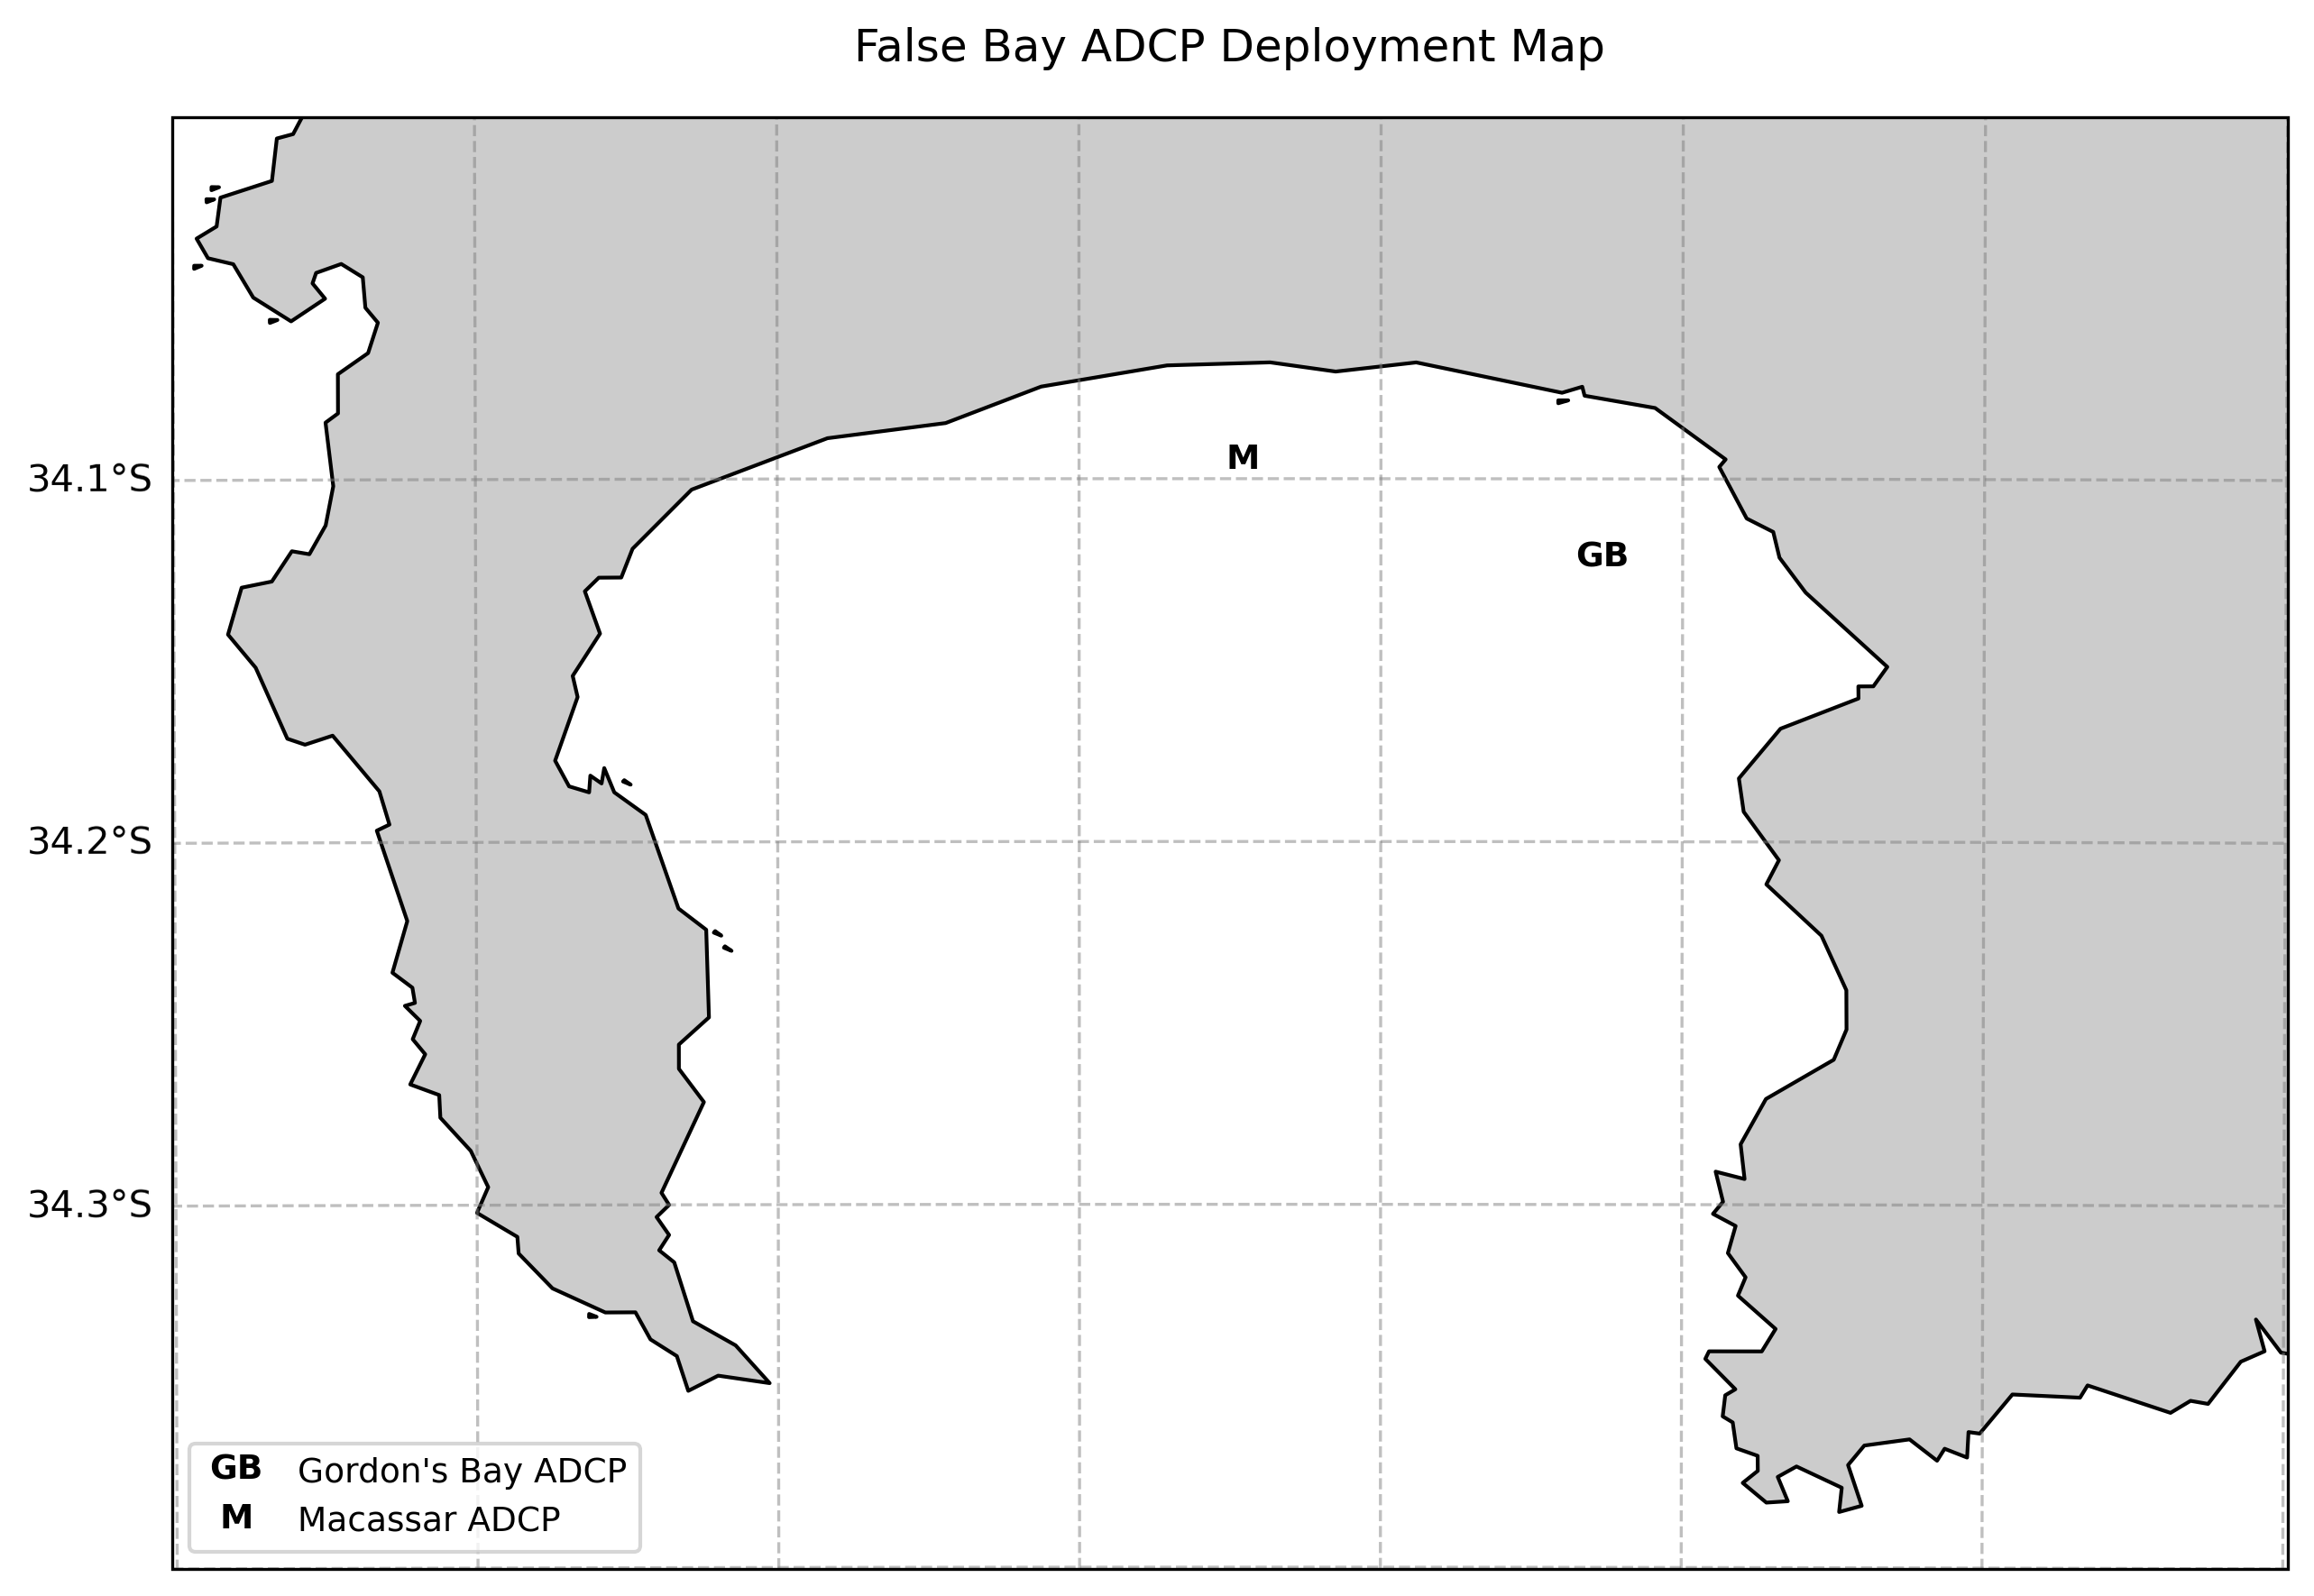

In [12]:
# Import necessary packages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Define extent and projection
extent = [18.3, 19.0, -34.4, -34.0]
central_lon = (extent[0] + extent[1]) / 2
central_lat = (extent[2] + extent[3]) / 2
projection = ccrs.LambertConformal(
    central_longitude=central_lon,
    central_latitude=central_lat,
    standard_parallels=(central_lat,)
)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=300, subplot_kw={'projection': projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Add coastlines
coastline = cfeature.GSHHSFeature(scale='high', levels=[1], facecolor='0.8', edgecolor='black')
ax.add_feature(coastline)

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# ADCP positions
stations = {
    'GB': {'lat': -34.1217, 'lon': 18.7735, 'name': "Gordon's Bay ADCP"},
    'M': {'lat': -34.094767, 'lon': 18.654117, 'name': "Macassar ADCP"}
}

# Plot station markers (text only, no background)
for label, station in stations.items():
    ax.text(station['lon'], station['lat'], label, 
            transform=ccrs.PlateCarree(),
            fontsize=9, fontweight='bold', 
            ha='center', va='center')

# Custom Legend Handler Class (simplified from original)
class TextLegendPatch:
    def __init__(self, text):
        self.text = text
    
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        t = plt.Text(
            x0 + width / 2,
            y0 + height / 2,
            self.text,
            ha='center',
            va='center',
            fontsize=fontsize,
            fontweight='bold',
        )
        handlebox.add_artist(t)
        return t

# Create dummy handles for the legend
gb_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)
mac_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)

# Add legend with custom handlers
ax.legend(
    [gb_patch, mac_patch],
    ["Gordon's Bay ADCP", "Macassar ADCP"],
    handler_map={
        gb_patch: TextLegendPatch('GB'),
        mac_patch: TextLegendPatch('M'),
    },
    loc='lower left',
    fontsize=9,
    frameon=True,
)

# Add title
plt.title("False Bay ADCP Deployment Map", fontsize=12, pad=15)

# Adjust layout and show
plt.tight_layout()
plt.show()

### Higher resolution bathymetry map

In [13]:
# Inspecting the bathy file
import os

file_path = r"C:\Users\ethan\OneDrive\UCT\Honours 2025\Honours Project\Map\bathymetry data files\Willem de Wet Bathymetry of Southern Africa Continental Shelf.grd"
with open(file_path, 'rb') as f:
    print(f.read(512))  # Read the first 512 bytes

# ESRI ASCII Grid format

b'ncols 8001\r\nnrows 4668\r\nxllcorner 11.998500107135204\r\nyllcorner -38.001499892864778\r\ncellsize 0.0029997857295907403\r\nnodata_value 1.7014100000000001E+038\r\n1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+038 1.7014100000000001E+0'


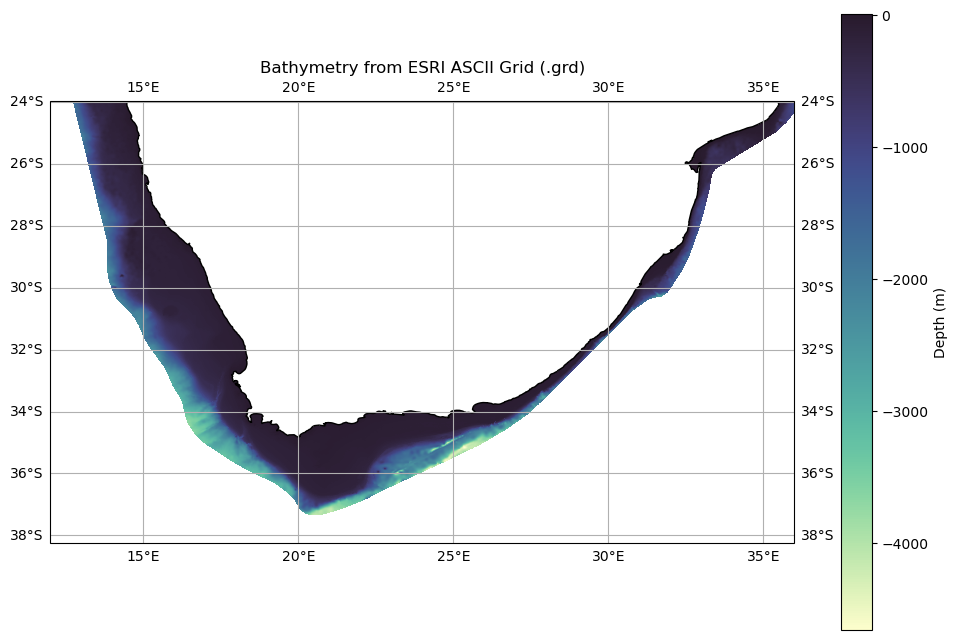

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

# File path
grd_file = r"C:\Users\ethan\OneDrive\UCT\Honours 2025\Honours Project\Map\bathymetry data files\Willem de Wet Bathymetry of Southern Africa Continental Shelf.grd"

# Read header
header = {}
with open(grd_file, 'r') as f:
    for _ in range(6):
        line = f.readline()
        key, value = line.strip().split()
        header[key.lower()] = float(value) if '.' in value or 'e' in value.lower() else int(value)

# Load bathymetry data skipping header lines
bathy_data = np.loadtxt(grd_file, skiprows=6)
# Replace NoData values with NaN
bathy_data = np.where(bathy_data == header['nodata_value'], np.nan, bathy_data)

# Construct coordinates
ncols = int(header['ncols'])
nrows = int(header['nrows'])
cellsize = header['cellsize']
xll = header['xllcorner']
yll = header['yllcorner']

x = np.linspace(xll + cellsize / 2, xll + (ncols - 0.5) * cellsize, ncols)
y = np.linspace(yll + cellsize / 2, yll + (nrows - 0.5) * cellsize, nrows)

# Flip bathy_data vertically (because ASCII grid starts from top row)
bathy_data = np.flipud(bathy_data)

# Plot bathymetry with Cartopy
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title("Bathymetry from ESRI ASCII Grid (.grd)")

ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# pcolormesh expects the x and y to be 1D arrays of cell centers
mesh = ax.pcolormesh(x, y, bathy_data, cmap=cmocean.cm.deep, shading='auto')

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label("Depth (m)")

# Optionally zoom to your data extent
ax.set_extent([xll, xll + ncols * cellsize, yll, yll + nrows * cellsize])

plt.show()



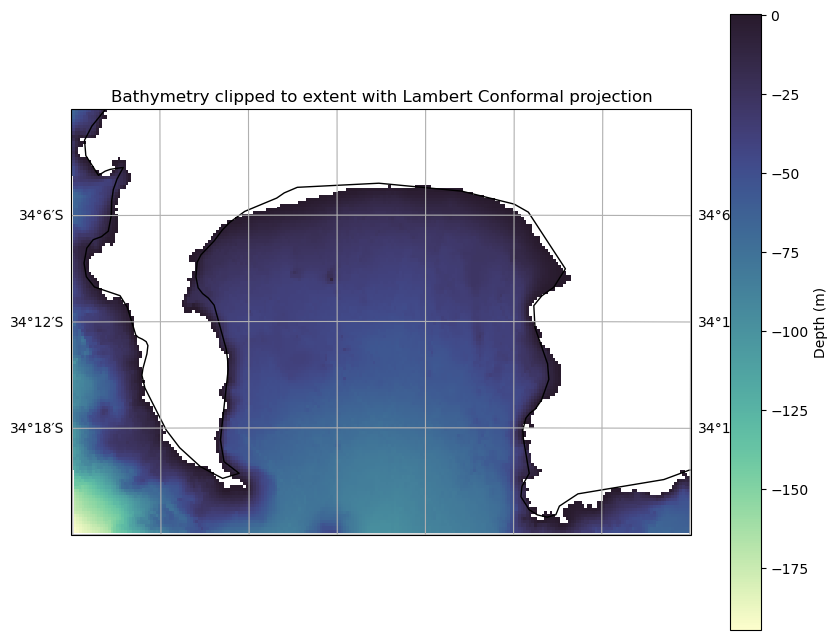

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmocean

# === Read the .grd ESRI ASCII Grid ===

grd_file = r"C:\Users\ethan\OneDrive\UCT\Honours 2025\Honours Project\Map\bathymetry data files\Willem de Wet Bathymetry of Southern Africa Continental Shelf.grd"

header = {}
with open(grd_file, 'r') as f:
    for _ in range(6):
        line = f.readline()
        key, value = line.strip().split()
        header[key.lower()] = float(value) if '.' in value or 'e' in value.lower() else int(value)

bathy_data = np.loadtxt(grd_file, skiprows=6)
bathy_data = np.where(bathy_data == header['nodata_value'], np.nan, bathy_data)

ncols = int(header['ncols'])
nrows = int(header['nrows'])
cellsize = header['cellsize']
xll = header['xllcorner']
yll = header['yllcorner']

x = np.linspace(xll + cellsize / 2, xll + (ncols - 0.5) * cellsize, ncols)
y = np.linspace(yll + cellsize / 2, yll + (nrows - 0.5) * cellsize, nrows)

bathy_data = np.flipud(bathy_data)

# === Define extent and Lambert Conformal projection ===
extent = [18.3, 19.0, -34.4, -34.0]
central_lon = (extent[0] + extent[1]) / 2
central_lat = (extent[2] + extent[3]) / 2

projection = ccrs.LambertConformal(
    central_longitude=central_lon,
    central_latitude=central_lat,
    standard_parallels=(central_lat,)
)

# === Clip the bathymetry data to the extent ===

# Find indices for x (longitude)
x_inds = np.where((x >= extent[0]) & (x <= extent[1]))[0]
# Find indices for y (latitude)
y_inds = np.where((y >= extent[2]) & (y <= extent[3]))[0]

# Subset data and coordinates
x_sub = x[x_inds]
y_sub = y[y_inds]
bathy_sub = bathy_data[np.ix_(y_inds, x_inds)]

# === Plotting ===

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, dms=True)

mesh = ax.pcolormesh(x_sub, y_sub, bathy_sub, cmap=cmocean.cm.deep, shading='auto', transform=ccrs.PlateCarree())

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label("Depth (m)")

plt.title("Bathymetry clipped to extent with Lambert Conformal projection")
plt.show()


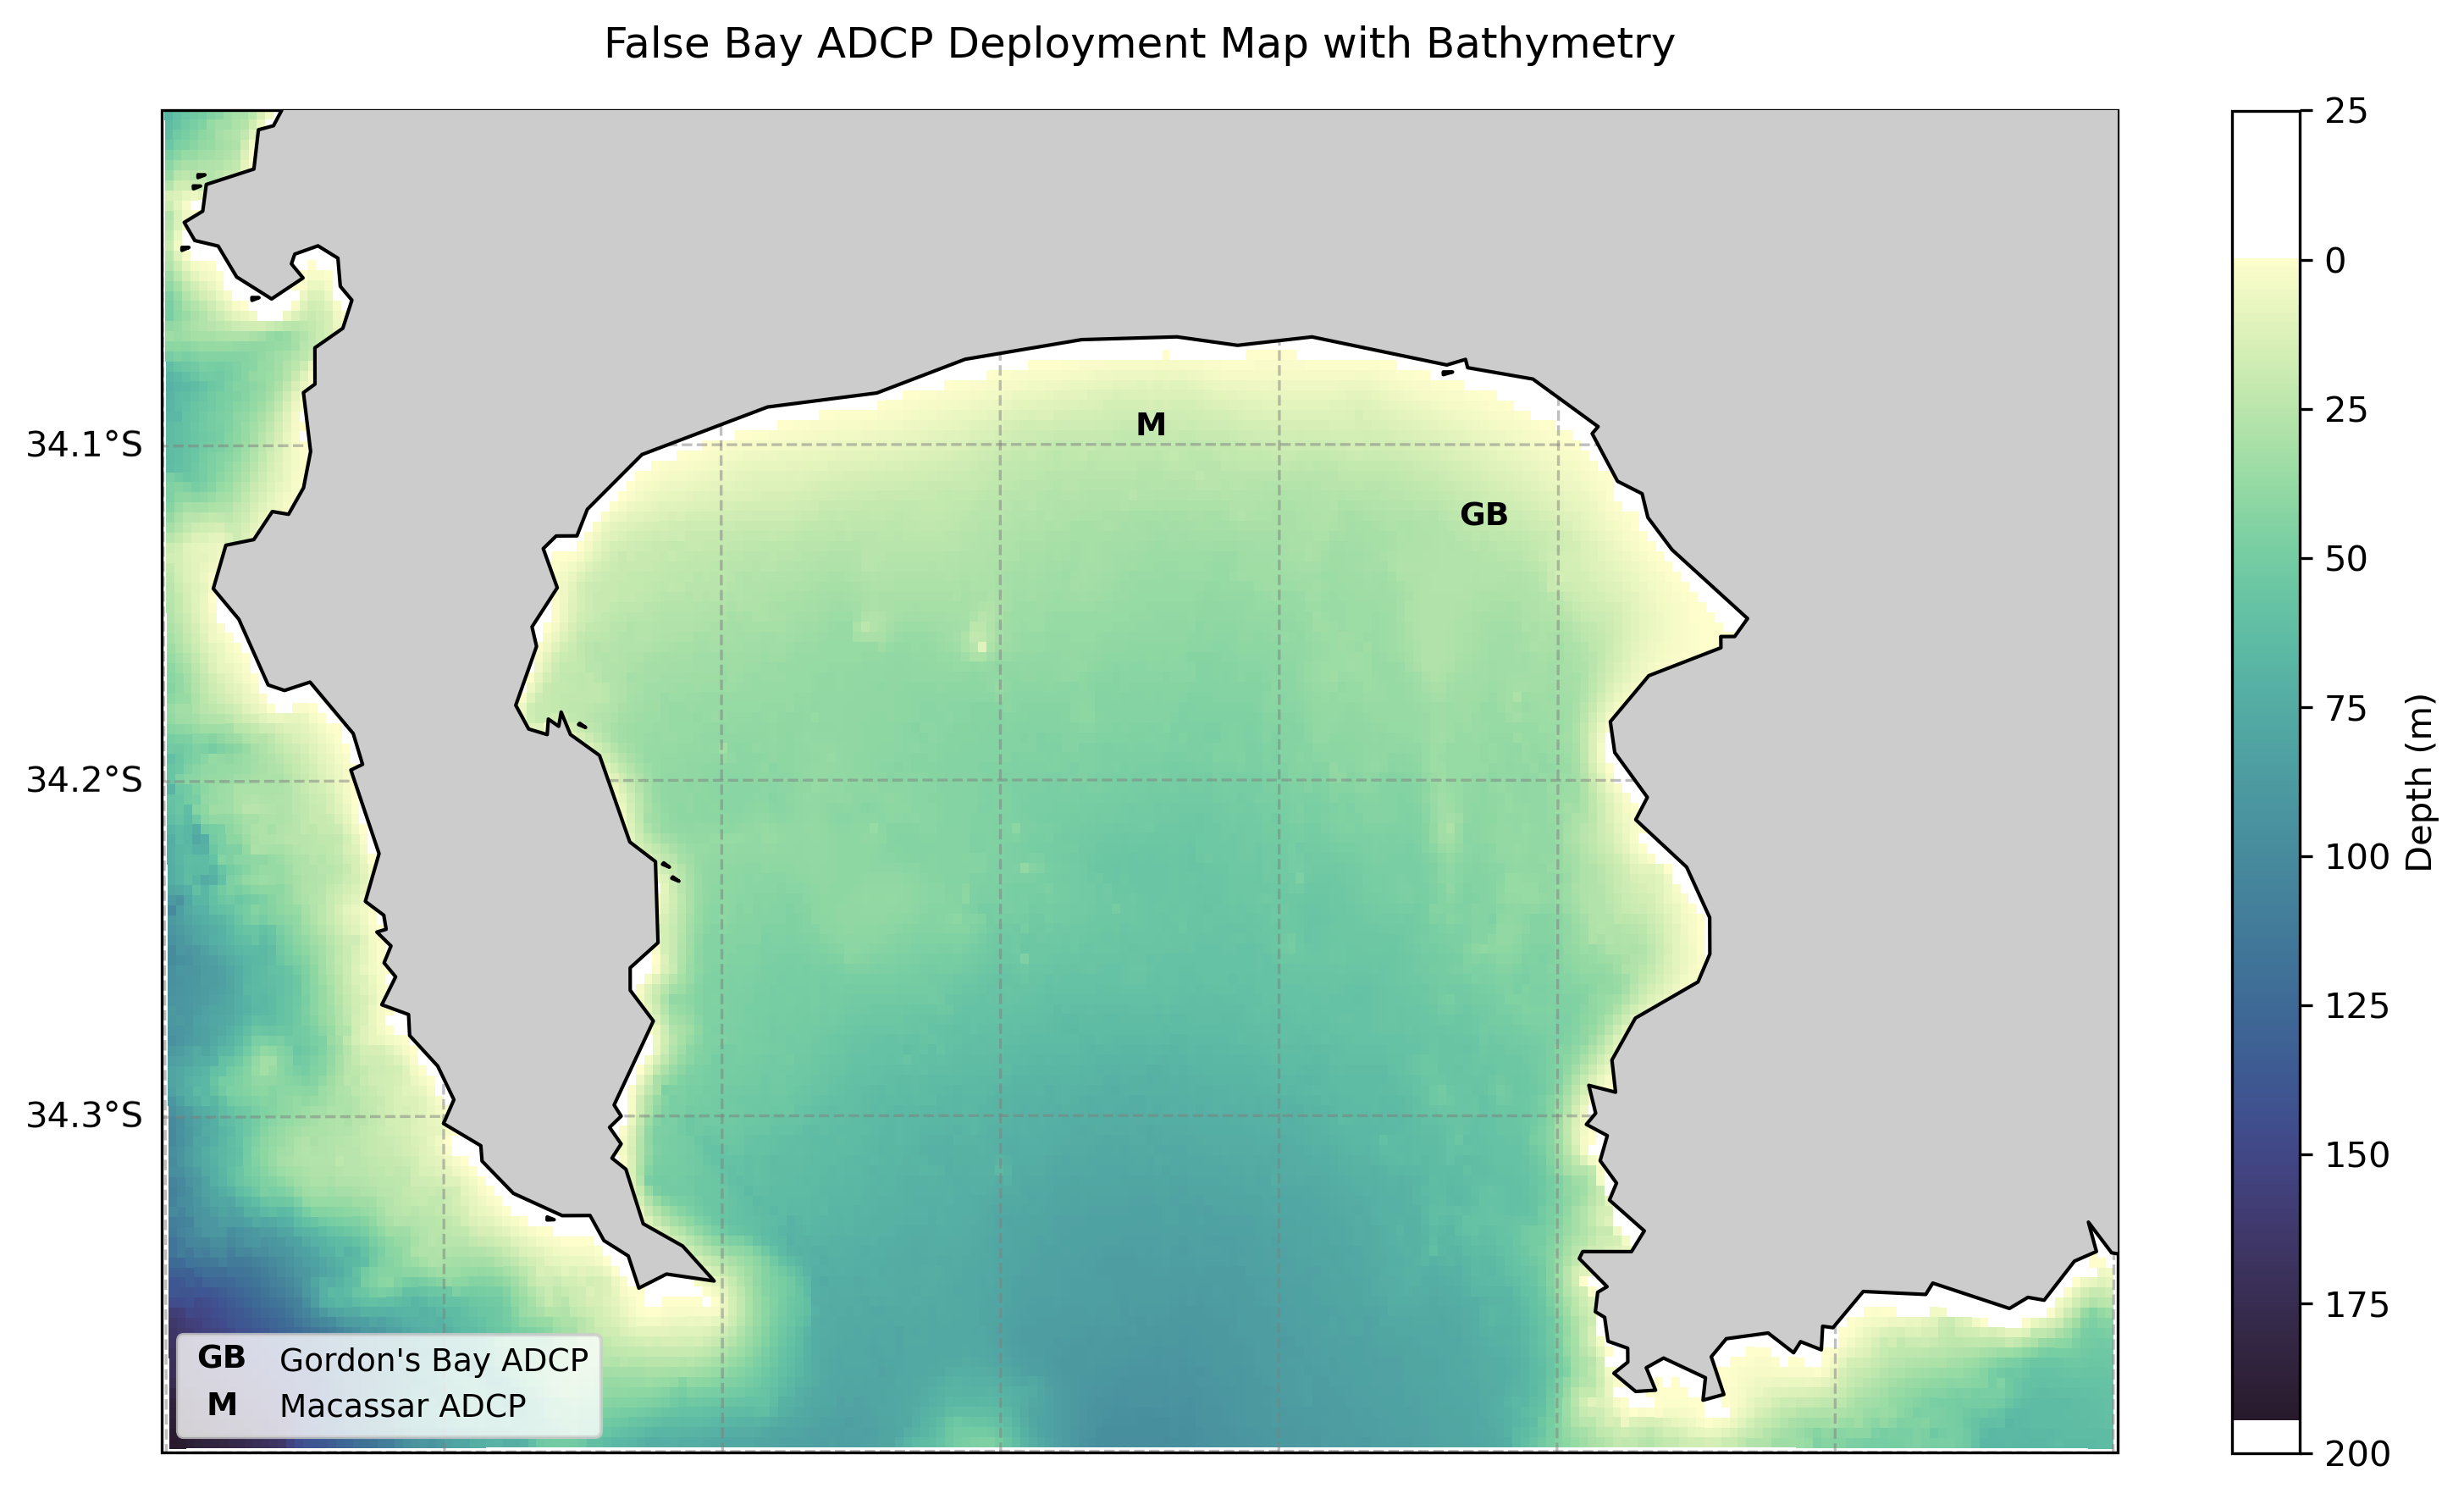

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.patches as mpatches

# === 1. Read and clip bathymetry raster ===

grd_file = r"C:\Users\ethan\OneDrive\UCT\Honours 2025\Honours Project\Map\bathymetry data files\Willem de Wet Bathymetry of Southern Africa Continental Shelf.grd"  # Change to your file path

# Read header info
header = {}
with open(grd_file, 'r') as f:
    for _ in range(6):
        line = f.readline()
        key, value = line.strip().split()
        header[key.lower()] = float(value) if '.' in value or 'e' in value.lower() else int(value)

# Load bathymetry data and replace NoData with nan
bathy_data = np.loadtxt(grd_file, skiprows=6)
bathy_data = np.where(bathy_data == header['nodata_value'], np.nan, bathy_data)

ncols = int(header['ncols'])
nrows = int(header['nrows'])
cellsize = header['cellsize']
xll = header['xllcorner']
yll = header['yllcorner']

x = np.linspace(xll + cellsize / 2, xll + (ncols - 0.5) * cellsize, ncols)
y = np.linspace(yll + cellsize / 2, yll + (nrows - 0.5) * cellsize, nrows)

bathy_data = np.flipud(bathy_data)

# Define extent to clip
extent = [18.3, 19.0, -34.4, -34.0]

x_inds = np.where((x >= extent[0]) & (x <= extent[1]))[0]
y_inds = np.where((y >= extent[2]) & (y <= extent[3]))[0]

x_sub = x[x_inds]
y_sub = y[y_inds]
bathy_sub = bathy_data[np.ix_(y_inds, x_inds)]

# # Take absolute value to make depth positive downward
# bathy_sub = np.abs(bathy_sub)

# === 2. Define projection ===

central_lon = (extent[0] + extent[1]) / 2
central_lat = (extent[2] + extent[3]) / 2
projection = ccrs.LambertConformal(
    central_longitude=central_lon,
    central_latitude=central_lat,
    standard_parallels=(central_lat,)
)

# === 3. Create figure and axis ===

fig, ax = plt.subplots(figsize=(10, 6), dpi=300, subplot_kw={'projection': projection})
ax.set_extent(extent, crs=ccrs.PlateCarree())

# === 4. Plot bathymetry raster as background with reversed colormap ===

mesh = ax.pcolormesh(
    x_sub, y_sub, bathy_sub,
    cmap=cmocean.cm.deep.reversed(),
    shading='auto',
    transform=ccrs.PlateCarree(),
    zorder=1
)

# === 5. Add coastline (GSHHS) and land mask ===

coastline = cfeature.GSHHSFeature(scale='high', levels=[1], facecolor='0.8', edgecolor='black')
ax.add_feature(coastline, zorder=3)

# === 6. Add gridlines ===

gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.right_labels = False
gl.top_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# === 7. Plot ADCP station markers with labels ===

stations = {
    'GB': {'lat': -34.1217, 'lon': 18.7735, 'name': "Gordon's Bay ADCP"},
    'M': {'lat': -34.094767, 'lon': 18.654117, 'name': "Macassar ADCP"}
}

for label, station in stations.items():
    ax.text(station['lon'], station['lat'], label, 
            transform=ccrs.PlateCarree(),
            fontsize=9, fontweight='bold', 
            ha='center', va='center',
            zorder=5)

# === 8. Custom Legend ===

class TextLegendPatch:
    def __init__(self, text):
        self.text = text
    
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        t = plt.Text(
            x0 + width / 2,
            y0 + height / 2,
            self.text,
            ha='center',
            va='center',
            fontsize=fontsize,
            fontweight='bold',
        )
        handlebox.add_artist(t)
        return t

gb_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)
mac_patch = mpatches.FancyBboxPatch((0, 0), 1, 1)

ax.legend(
    [gb_patch, mac_patch],
    ["Gordon's Bay ADCP", "Macassar ADCP"],
    handler_map={
        gb_patch: TextLegendPatch('GB'),
        mac_patch: TextLegendPatch('M'),
    },
    loc='lower left',
    fontsize=9,
    frameon=True,
)

# === 9. Add colorbar for bathymetry ===

cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05, fraction=0.046)
cbar.set_label('Depth (m)')

ticks = cbar.get_ticks()
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{abs(tick):.0f}" for tick in ticks])

#cbar.ax.invert_yaxis()

# === 10. Title and layout ===

plt.title("False Bay ADCP Deployment Map with Bathymetry", fontsize=12, pad=15)
plt.tight_layout()
plt.show()
